In [1]:
import sys
sys.path.append('/home/nate/github/scrape_ib/')
import scrape_ib as si

In [26]:
import pandas as pd
import seaborn as sns

In [2]:
ticker = 'TSLA'
full_df = si.load_data(ticker=ticker)

In [3]:
full_df.head()

,open,high,low,close,volume,bid_open,bid_high,bid_low,bid_close,ask_open,ask_high,ask_low,ask_close,opt_vol_open,opt_vol_high,opt_vol_low,opt_vol_close
datetime,,,,,,,,,,,,,,,,,
2010-06-29 09:03:00-04:00,NaN,NaN,NaN,NaN,NaN,0.01,242.55,0.01,242.55,199999.98,199999.98,17.0,17.0,NaN,NaN,NaN,NaN
2010-06-29 09:06:00-04:00,NaN,NaN,NaN,NaN,NaN,242.55,246.00,66.00,66.00,17.00,17.00,16.0,16.0,NaN,NaN,NaN,NaN
2010-06-29 09:09:00-04:00,NaN,NaN,NaN,NaN,NaN,66.00,66.00,66.00,66.00,16.00,16.00,16.0,16.0,NaN,NaN,NaN,NaN
2010-06-29 09:15:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.00,16.00,15.0,15.0,NaN,NaN,NaN,NaN
2010-06-29 09:18:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.00,16.00,15.0,16.0,NaN,NaN,NaN,NaN


In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289347 entries, 2010-06-29 09:03:00-04:00 to 2019-04-11 13:57:00-04:00
Data columns (total 17 columns):
open             274698 non-null float64
high             274698 non-null float64
low              274698 non-null float64
close            274698 non-null float64
volume           274698 non-null float64
bid_open         280636 non-null float64
bid_high         280636 non-null float64
bid_low          280636 non-null float64
bid_close        280636 non-null float64
ask_open         279785 non-null float64
ask_high         279785 non-null float64
ask_low          279785 non-null float64
ask_close        279785 non-null float64
opt_vol_open     234722 non-null float64
opt_vol_high     234722 non-null float64
opt_vol_low      234722 non-null float64
opt_vol_close    234722 non-null float64
dtypes: float64(17)
memory usage: 39.7 MB


In [8]:
first_nona = full_df[~full_df['opt_vol_open'].isna()].index[0]

In [10]:
full_df_nona = full_df.loc[first_nona:]

In [11]:
full_df_nona.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241448 entries, 2011-11-09 07:30:00-05:00 to 2019-04-11 13:57:00-04:00
Data columns (total 17 columns):
open             234337 non-null float64
high             234337 non-null float64
low              234337 non-null float64
close            234337 non-null float64
volume           234337 non-null float64
bid_open         237283 non-null float64
bid_high         237283 non-null float64
bid_low          237283 non-null float64
bid_close        237283 non-null float64
ask_open         237291 non-null float64
ask_high         237291 non-null float64
ask_low          237291 non-null float64
ask_close        237291 non-null float64
opt_vol_open     234722 non-null float64
opt_vol_high     234722 non-null float64
opt_vol_low      234722 non-null float64
opt_vol_close    234722 non-null float64
dtypes: float64(17)
memory usage: 33.2 MB


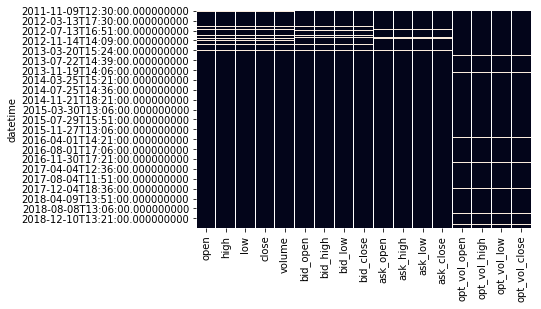

In [15]:
sns.heatmap(full_df_nona.isnull(), cbar=False)

In [17]:
last_na_close = full_df[full_df['close'].isna()].index[-1]

In [19]:
full_df_nona = full_df.loc[last_na_close:].iloc[1:]

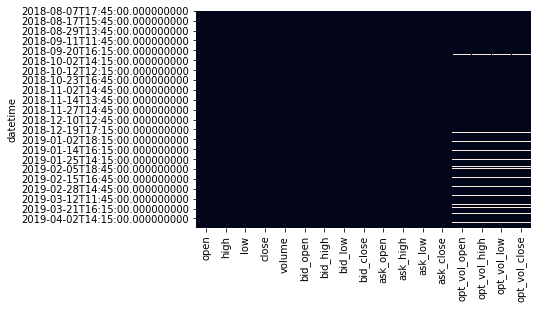

In [20]:
sns.heatmap(full_df_nona.isnull(), cbar=False)

In [31]:
last_day = full_df_nona.index[-1]
last_day_df = full_df_nona[last_day.date().strftime('%Y-%m-%d')]

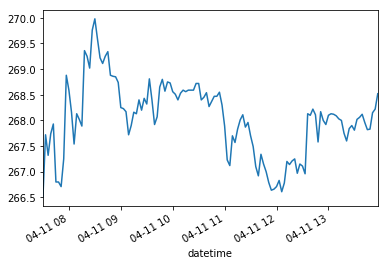

In [32]:
last_day_df['close'].plot()

In [33]:
last_day_df

,open,high,low,close,volume,bid_open,bid_high,bid_low,bid_close,ask_open,ask_high,ask_low,ask_close,opt_vol_open,opt_vol_high,opt_vol_low,opt_vol_close
datetime,,,,,,,,,,,,,,,,,
2019-04-11 07:30:00-04:00,268.30,268.50,266.08,266.51,1696.0,268.10,268.44,266.06,266.30,268.50,268.51,266.18,266.66,0.559497,0.559497,0.525081,0.530161
2019-04-11 07:33:00-04:00,266.50,268.27,265.61,267.72,752.0,266.30,268.09,265.60,267.40,266.66,268.40,265.84,267.81,0.530161,0.530955,0.530161,0.530955
2019-04-11 07:36:00-04:00,267.49,268.95,267.24,267.32,339.0,267.40,268.66,267.00,267.10,267.81,268.98,267.31,267.39,0.530955,0.530955,0.524843,0.528685
2019-04-11 07:39:00-04:00,267.39,268.00,267.31,267.74,239.0,267.10,267.94,267.10,267.55,267.39,268.16,267.27,267.79,0.528685,0.528685,0.527637,0.527637
2019-04-11 07:42:00-04:00,267.88,267.99,267.50,267.93,189.0,267.55,267.90,267.40,267.66,267.79,267.99,267.55,267.97,0.527637,0.527637,0.526383,0.526478
2019-04-11 07:45:00-04:00,267.90,267.90,266.50,266.80,367.0,267.66,267.70,266.50,266.59,267.97,267.98,266.59,266.91,0.526478,0.528224,0.526478,0.528224
2019-04-11 07:48:00-04:00,266.73,267.14,266.34,266.80,516.0,266.59,267.14,266.29,266.55,266.91,267.49,266.38,266.89,0.528224,0.529320,0.527939,0.527939
2019-04-11 07:51:00-04:00,266.69,267.23,266.26,266.71,208.0,266.55,267.12,266.20,266.74,266.89,267.35,266.35,266.95,0.527939,0.528383,0.527939,0.528383
2019-04-11 07:54:00-04:00,266.74,267.36,266.58,267.25,149.0,266.74,267.36,266.50,267.12,266.95,267.44,266.58,267.25,0.528383,0.528383,0.528177,0.528177
